# Calibrate Cameras
[https://github.com/jayrambhia/Vision/blob/master/OpenCV/C%2B%2B/stereocalibrate.cpp](https://github.com/jayrambhia/Vision/blob/master/OpenCV/C%2B%2B/stereocalibrate.cpp)

In [13]:
class Args:
    uncalibrated_dataset_path = "../../resources/images/uncalibrated/calibration_dataset.npz"
    calibration_file_path = "../../resources/calibrations/calibration.yml"
    common_points_threshold = 60
    alpha = -1 # 0 => calibrated images wont contain 'black' spaces, 1 => no pixels lost, -1 => auto
args = Args()

In [14]:
from models.dataset.dataset_interface import open_dataset
from models.dataset.undistort import undistort_images
from models.calibration.calibration import StereoCalibration
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Actual Calibration

In [15]:
rs_rgb, rs_z, rs_cm, rs_dc, zv_rgb, zv_z, zv_cm, zv_dc = open_dataset(args.uncalibrated_dataset_path)
print(f"Opened dataset containing {len(rs_rgb)} image sets")

# image sizes of realsense and zivid
img_rs_size = tuple(reversed(rs_rgb[0].shape[:2]))
img_zv_size = tuple(reversed(rs_rgb[0].shape[:2]))

# charuco board configuration
charuco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50) 
charuco_board = cv2.aruco.CharucoBoard_create(7, 5, 7.5, 5.625, charuco_dict)

# get extrinsic transformation between both cameras
calibration = StereoCalibration()
calibration.configure(
    charuco_dict=charuco_dict, 
    charuco_board=charuco_board, 
    common_points_threshold=args.common_points_threshold, 
    imgs_1=rs_rgb,
    imgs_1_cm=rs_cm,
    imgs_1_dc=rs_dc,
    imgs_2=zv_rgb,
    imgs_2_cm=zv_cm,
    imgs_2_dc=zv_dc,
    alpha=0.5
)

# save calibration result
calibration.save_calibration(args.calibration_file_path)


Opened dataset containing 24 image sets


## Visualize

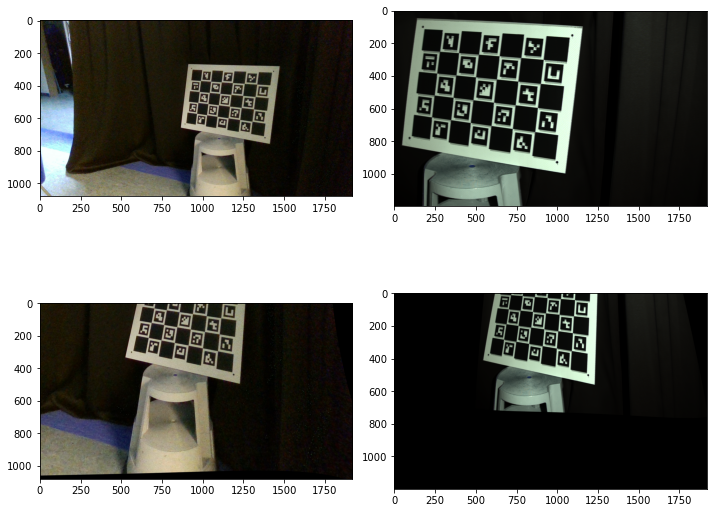

In [16]:

# visualize calibration result
idx = 4
img1, img2 = rs_rgb[idx], zv_rgb[idx]
imgU1, imgU2 = calibration.remap(img1, img2)

f, axarr = plt.subplots(2, 2, figsize=(10, 8))
f.tight_layout()
axarr[0][0].imshow(img1)
axarr[0][1].imshow(img2)
axarr[1][0].imshow(imgU1)
axarr[1][1].imshow(imgU2)